In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import gzip
import pickle

from torch import nn
from torch import tensor
import torch.nn.functional as F

from fastai import datasets
from exp.learner import Learner
from exp.optimizer import SgdOptimizer
import matplotlib.pyplot as plt

## Get Data

In [6]:
def get_data():
    path = datasets.download_data(
        url="http://deeplearning.net/data/mnist/mnist.pkl",
        fname="/Users/ricardofernandez/.fastai/data/mnist/mnist.pkl.gz",
    ext=".gz")
    
    with gzip.open(path, "rb") as f:
        ((x_train, y_train), (x_test, y_test), _) = pickle.load(f, encoding="latin-1")
    return map(tensor, (x_train, y_train, x_test, y_test))

In [7]:
x_train, y_train, x_test, y_test = get_data()

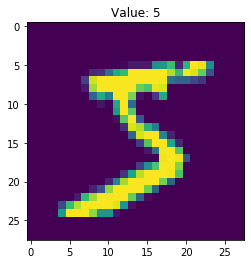

In [8]:
plt.imshow(x_train[0].view(28,28))
plt.title(f"Value: {y_train[0]}");

## Model 

In [9]:
n_in = x_train.shape[1]
n_h = 50
n_out = 10
model = nn.Sequential(nn.Linear(n_in, n_h), nn.ReLU(), nn.Linear(n_h, n_out))

In [10]:
model(x_train[:10]).shape

torch.Size([10, 10])

## Loss Function

In [11]:
loss = F.cross_entropy
loss(model(x_train[:10]), y_train[:10])

tensor(2.3306, grad_fn=<NllLossBackward>)

## Optimizer

In [42]:
sgd = SgdOptimizer(model.parameters())
sgd

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])